In [34]:
# Подключение внешних модулей
from IPython.display import Image
import os
import time
import numpy as np
import pydot
# Настройка упрощает разработку, не влияет на работу
%load_ext autoreload
%autoreload 2

# Импорт модуля для рисования дерева
from draw import visit 

# Если используется ОС Windows необходимо указать путь к Graphviz
if os.name == "nt":
    os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Метод полного перебора

In [35]:
V = int(input("Объём рюкзака: "))
n = int(input("Колличество предметов в рюкзаке: "))
v = [int(input("Объём {} предмета".format(i + 1))) for i in range(n)]

In [36]:
# Рекурсиваня функция перебора
# В ней же считаем T для последющего подсчёта 
T = -1
def f(V, v, soulutions, cum_sums, history= "", v_sum = 0):
    global T
    T += 1
    # Не раскрывем вершину, если:
    # 1) У нас закончились предметы, для которых мы можем сделать выбор
    # 2) Сумма объёмов предметов которые мы сложили в рюкзак равна или превышает его объём
    # 3) Сумма объёмов предметов которые мы сложили в рюкзак и объёмов предметов для которых мы ещё не сделали выбор меньше объёма рюказака
    if len(v) == 0 or v_sum >= V or (V - v_sum) > cum_sums[-(len(v))]:
        # Если набранный объём равен объёму рюказака сохраняем маску преметов в массив решений 
        res = None
        if V == v_sum:
            soulutions.append(history + "0" * len(v))
            res = "0" * len(v)
            res += " = " + str(v_sum) + " "
            res += "S"
        else:
            # Всё что находится в этом else необъодимо для подготовки дерева к отрисовке и не имеет непосредственного отношения к решению задачи
            if v_sum > V:
                res = "0" * len(v)
                res += " = " + str(v_sum) + " "
            else:
                res = "1" * len(v)
                if len(v) > 0:
                    res += " = " + str(v_sum + cum_sums[-(len(v))]) + " "
                else:
                    res += " = " + str(v_sum) + " "

            res += "F"
        return res

    # Рекурсивно вызываем функцию для случаев когда следющий предмет был и не был взят
    return {
        history + "0": f(V, v[1:], soulutions, cum_sums, history + "0", v_sum), 
        history + "1": f(V, v[1:], soulutions, cum_sums, history + "1", v_sum + v[0])
        }

In [37]:
soulutions = []
start_time = time.time()
# Считаем суммарный объём всех прдметов начиная с i-того для i в [0, n)
cum_sum = list(reversed(np.cumsum(list(reversed(v)))))
# Запускаем рекурсивню функцию
r = {"?" * len(v): f(V, v, soulutions, cum_sum)}
# Выводим время выполнения и все найденные подпоследовательности
print("--- %d miliseconds ---" % ((time.time() - start_time) * 1000))
print(soulutions)

--- 1 miliseconds ---
['11111111111111111111']


In [38]:
# Выводим дерево в png файл
graph = pydot.Dot(graph_type='graph')
visit(graph, r, count=n)
# Для отладки можно так же вывести дерево в dot файл
# graph.write('./graph.dot')
graph.write_png('./graph.png')

L = 20
T = 40
P = 0.5


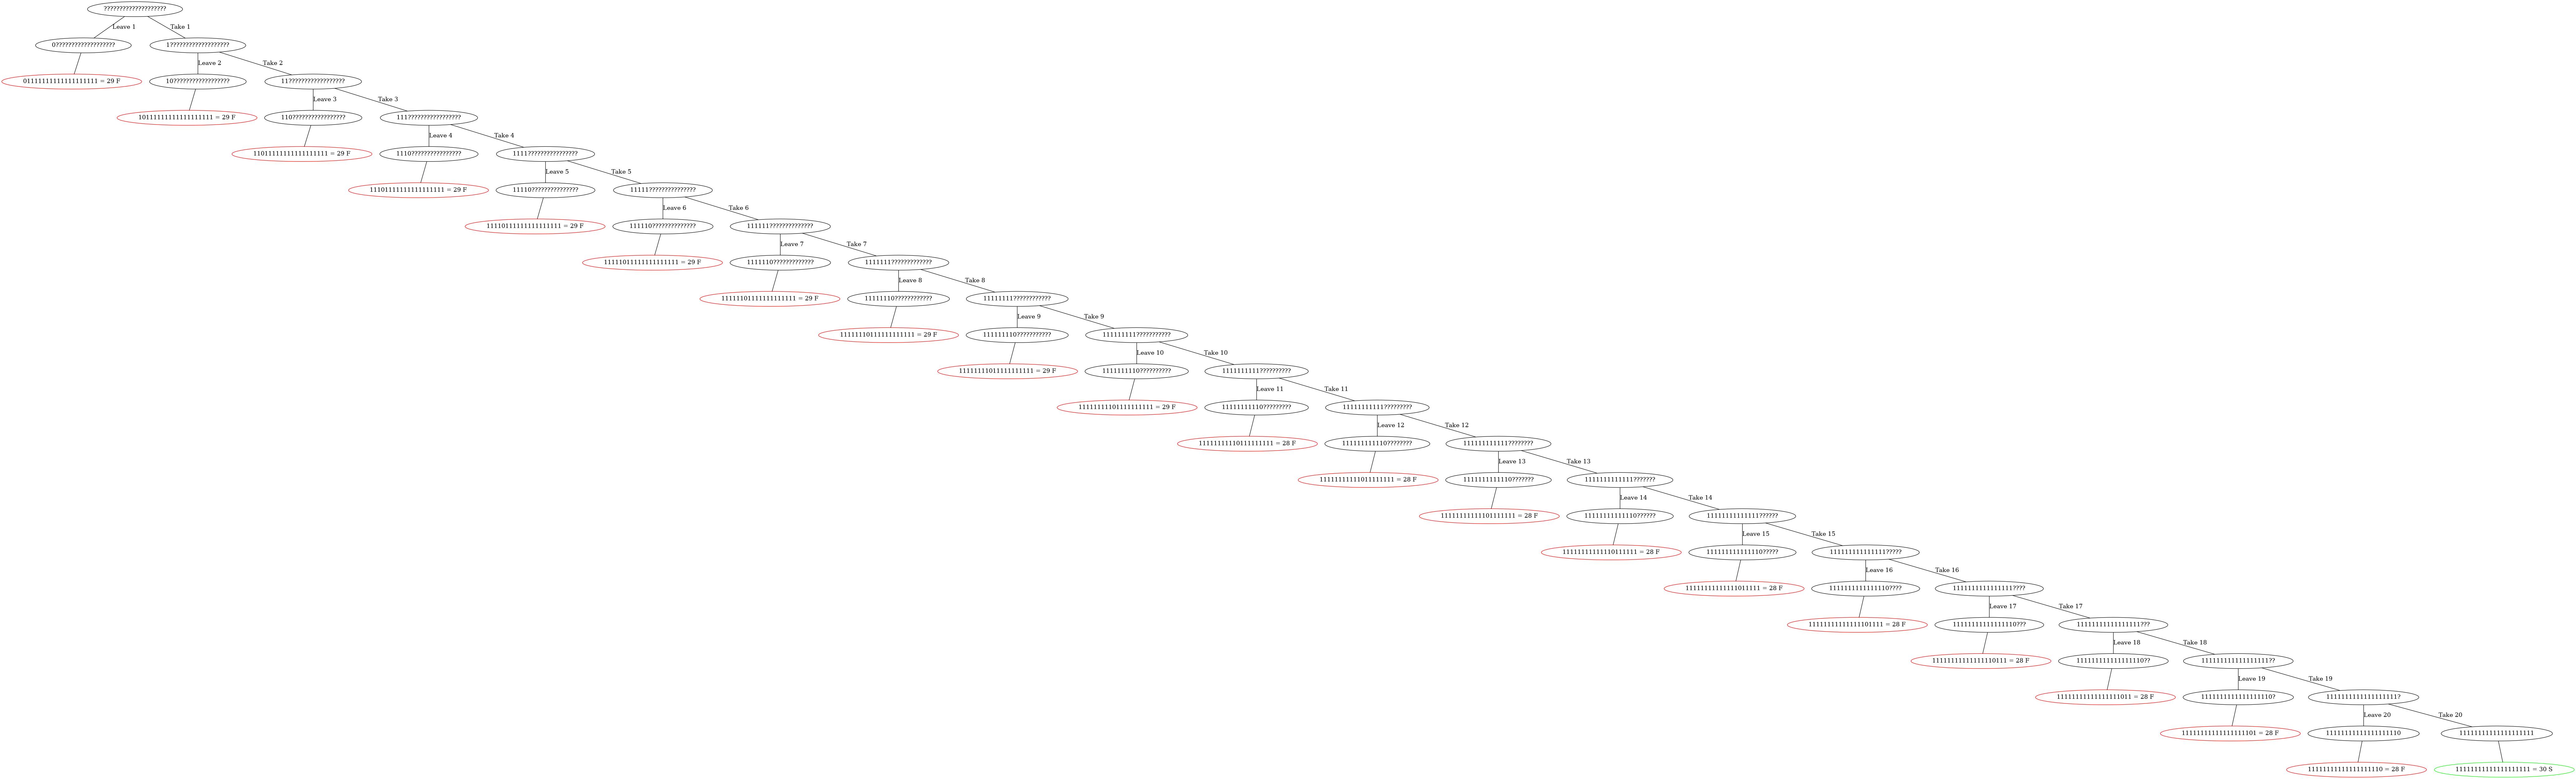

In [39]:
# Для подсчёта L строим дерево сохраняя только те ветки, которые ведут к подпоследовательностям явлющимися равными объёму рюказака 
solution_r = {}
L = 0
for solution in soulutions:
    curr_pos = solution_r
    for c in solution:
        if c not in curr_pos:
            curr_pos[c] = {}
            L += 1
        curr_pos = curr_pos[c]
    
# Рассчитываем и выводим критерий целенаправленности
print(f"L = {L}")
print(f"T = {T}")
P = L / T
print(f"P = {round(P, 2)}")
Image(filename='graph.png') 